In [28]:
library(data.table)
library(dplyr)
library(ggplot2)
library(knitr)
library(stringr)
library(DT)
library(plotly)
library(arules)
library(arulesViz)
library(visNetwork)
library(igraph)
library(kableExtra)
library(RColorBrewer)

location_data = read.table(file = '../../data/nCoV2019/for_use/geographic_date.tsv', sep = '\t', header = TRUE,
                           row.names = 1)

# Change all columns to be of type "logical"
for(i in c(1:ncol(location_data))) {
    location_data[,i] <- as.logical(location_data[,i])
}

head(location_data)

,X01.02.2020,X01.03.2020,X02.02.2020,X02.03.2020,X03.02.2020,X03.03.2020,X04.02.2020,X04.03.2020,X05.02.2020,X05.03.2020,⋯,X27.02.2020,X27.03.2020,X28.01.2020,X28.02.2020,X28.03.2020,X29.01.2020,X29.02.2020,X29.03.2020,X30.01.2020,X31.01.2020
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
"Aa en Hunze, Drenthe, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Aalsmeer, North Holland, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Aalten, Gelderland, Netherlands",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Abbeville County, South Carolina, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Abu Dhabi, Abu Dhabi, United Arab Emirates",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
"Acadia Parish, Louisiana, United States",FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


# Convert data frame to binary transaction matrix

In [29]:
location_data_transactions <- as(location_data, "transactions")
summary(location_data_transactions)

transactions as itemMatrix in sparse format with
 1615 rows (elements/itemsets/transactions) and
 72 columns (items) and a density of 0.0629085 

most frequent items:
X24.03.2020 X22.03.2020 X23.03.2020 X21.03.2020 X20.03.2020     (Other) 
        554         504         476         458         426        4897 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
446 229 170 177 131 104  87  41  33  26  35  24  25  22  20  15  11   3   4   2 
 21  23  24 
  7   2   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   4.529   6.000  24.000 

includes extended item information - examples:
       labels   variables levels
1 X01.02.2020 X01.02.2020   TRUE
2 X01.03.2020 X01.03.2020   TRUE
3 X02.02.2020 X02.02.2020   TRUE

includes extended transaction information - examples:
                         transactionID
1    Aa en Hunze, Drenthe, Netherlands
2 Aalsmeer, North Holland, Ne

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5    0.03      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 48 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[72 item(s), 1615 transaction(s)] done [0.00s].
sorting and recoding items ... [39 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 done [0.00s].
writing ... [299 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 299 rules 

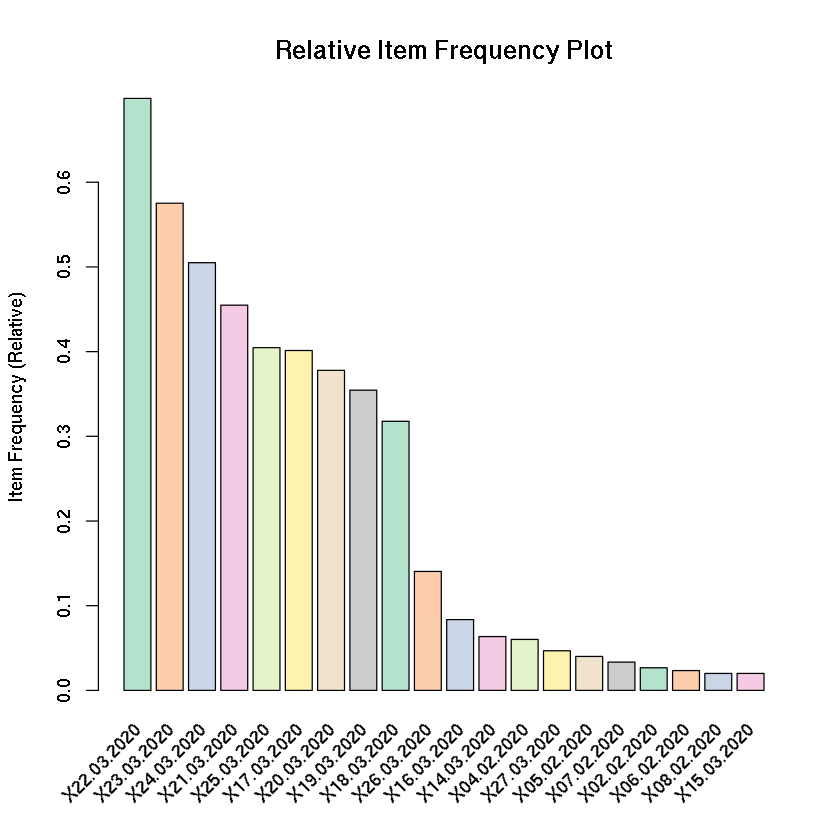

In [35]:
#data(location_data)
location_rules <- apriori(location_data_transactions, parameter=list(support=0.03, confidence=0.9))
location_rules

arules::itemFrequencyPlot(items(location_rules),
    topN=20,
    col=brewer.pal(8,'Pastel2'),
    main='Relative Item Frequency Plot',
    type="relative",
    ylab="Item Frequency (Relative)")

# Scatterplot

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



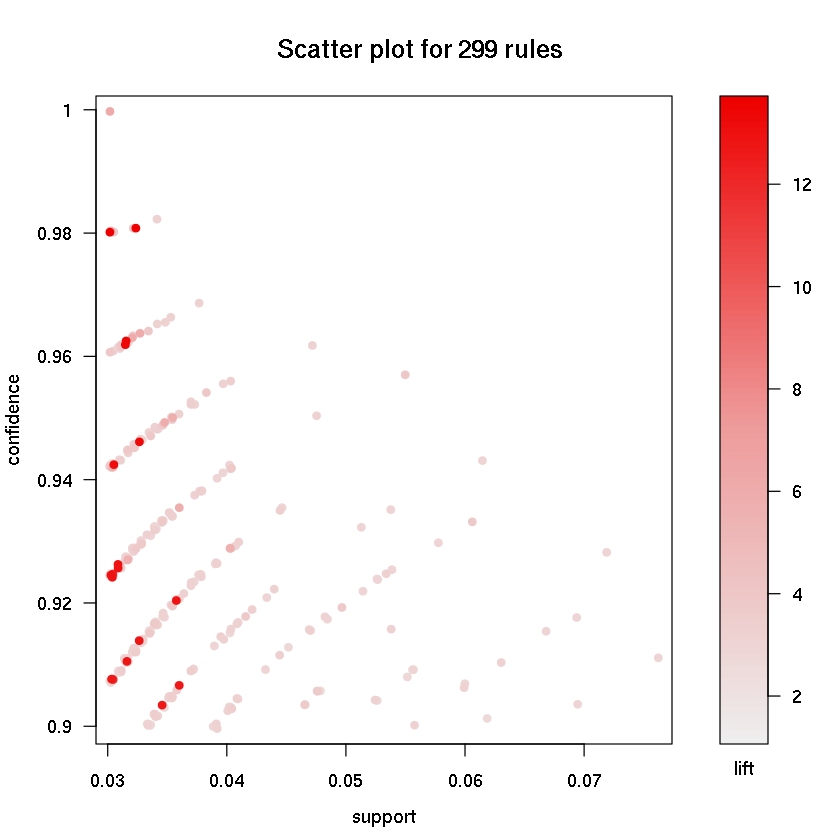

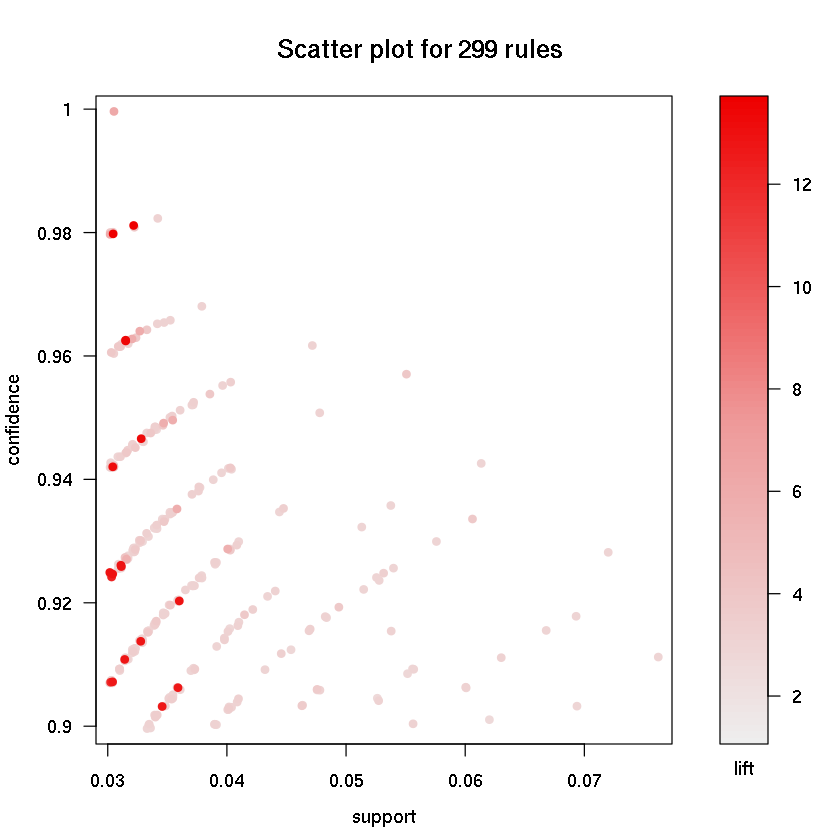

In [36]:
plot(location_rules)
sel <- plot(location_rules)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



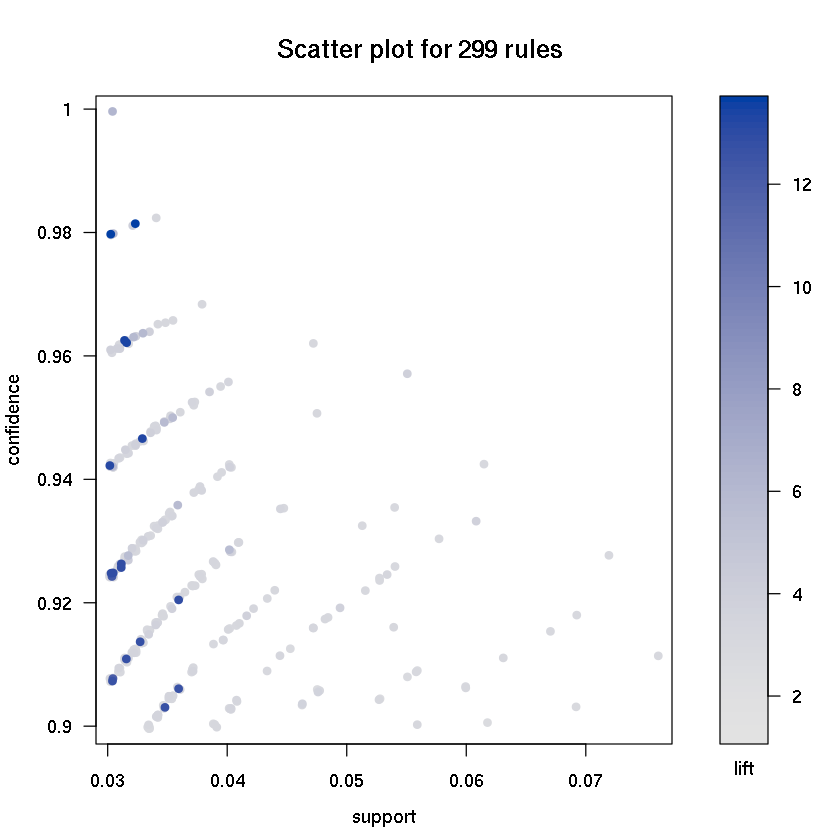

In [37]:
library(colorspace) # for sequential_hcl
plot(location_rules, control=list(col=sequential_hcl(100)))

# Two-key plot is a scatterplot with shading = "order"

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



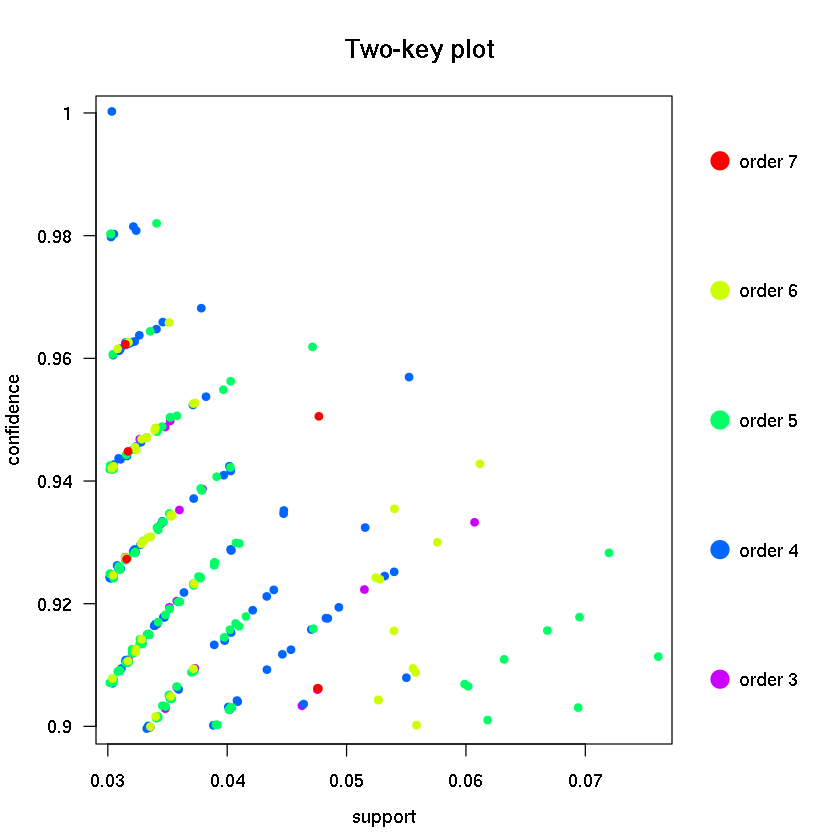

In [38]:
plot(location_rules, shading="order", control=list(main = "Two-key plot",
col=rainbow(5)))

# The following techniques work better with fewer rules

In [39]:
subrules <- subset(location_rules, lift>1)
subrules

set of 299 rules 

# 2D matrix with shading

# graphs only work well with very few rules

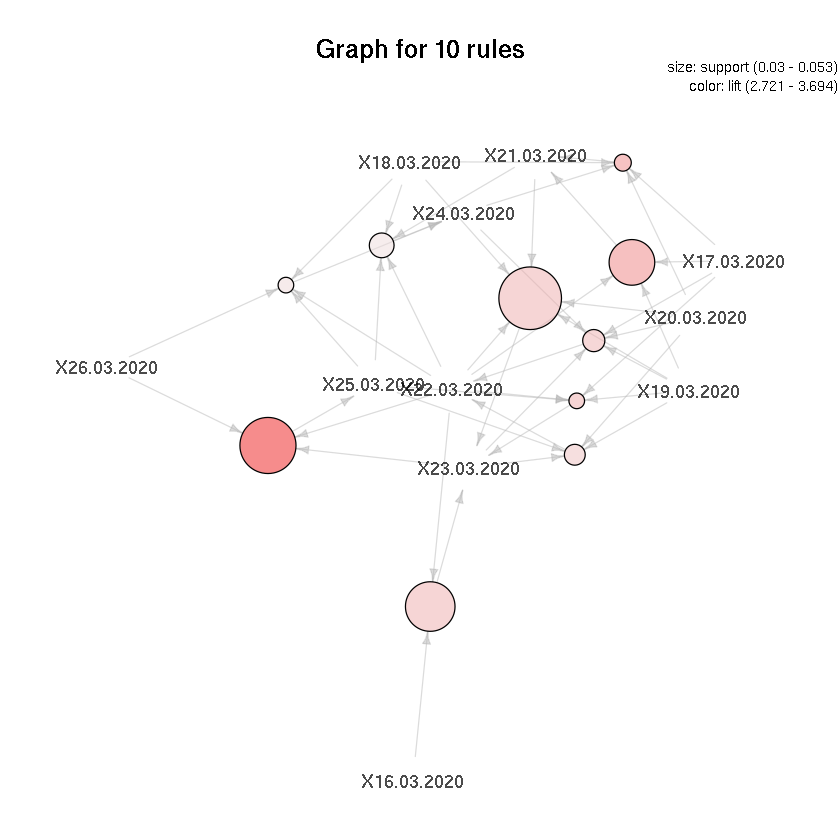

In [40]:
subrules2 <- sample(location_rules, 10)
plot(subrules2, method="graph")

# igraph layout generators can be used (see ? igraph::layout_)

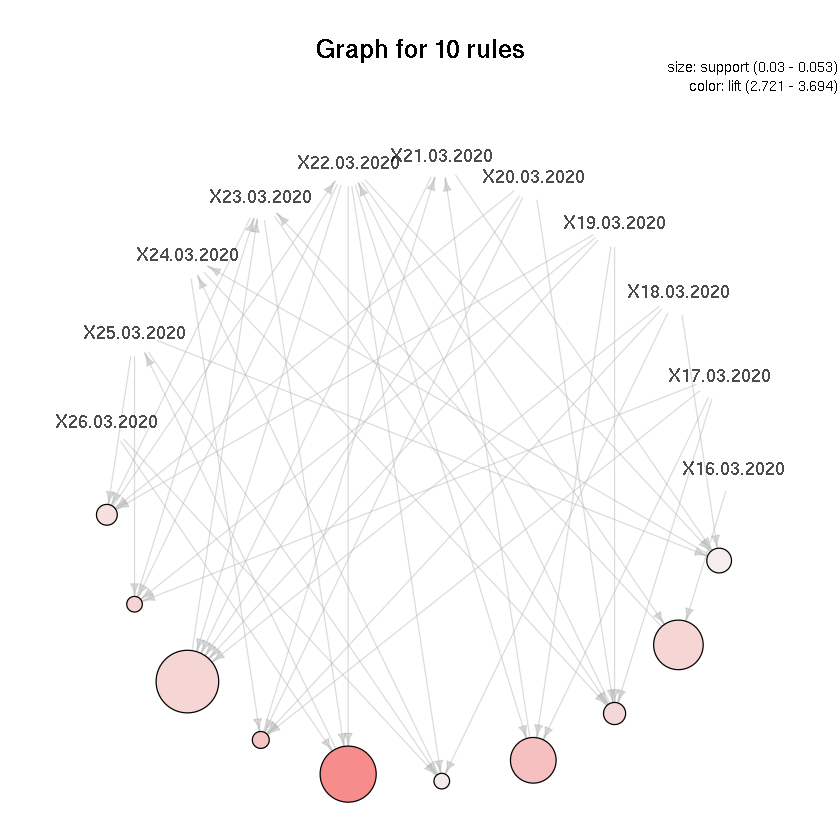

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
main	 =  Graph for 10 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EE

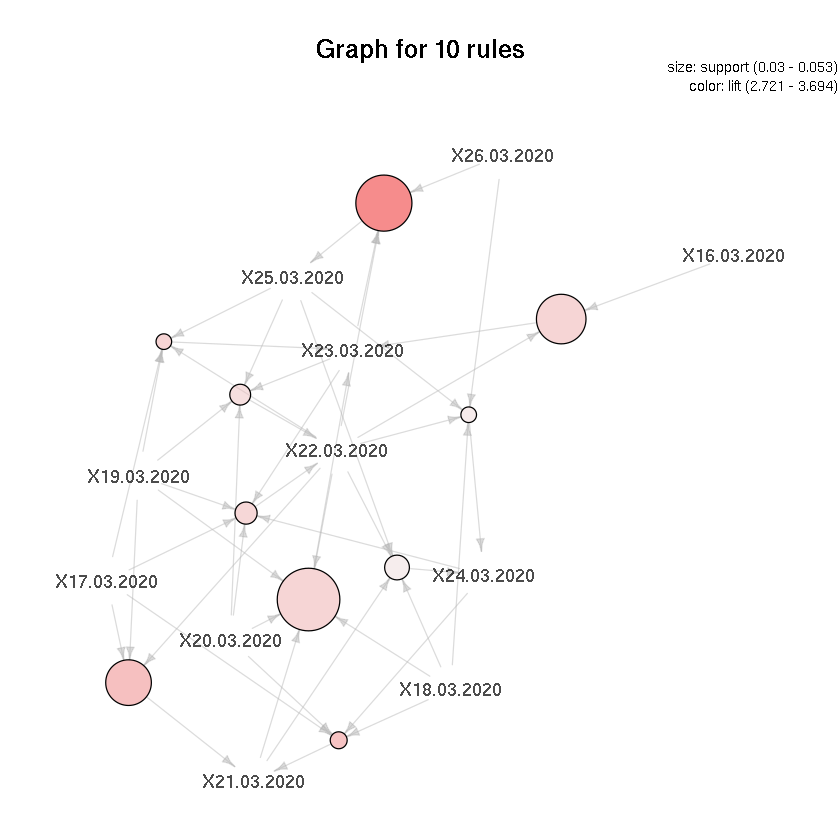

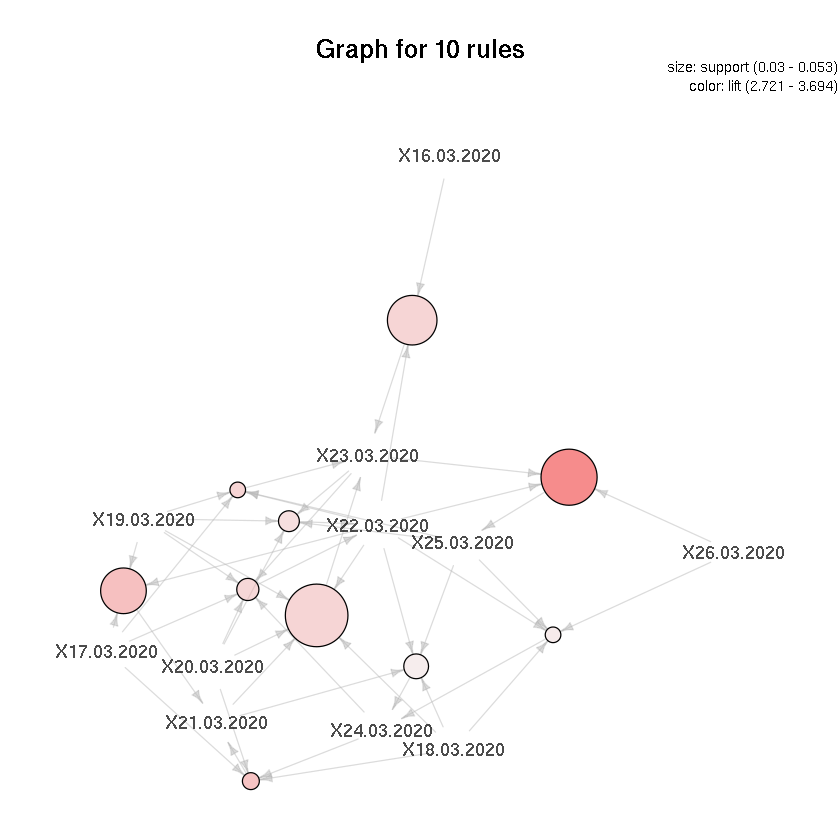

In [41]:
plot(subrules2, method="graph", control=list(layout=igraph::in_circle()))
plot(subrules2, method="graph", control=list(layout=igraph::with_graphopt(spring.const=5, mass=50)))

plot(subrules2, method="graph", control=list(type="itemsets"))
#plot(subrules2, method="graph", engine= 'interactive')